# Heap Sort

## Introduction
***
<p>Within this Jupyter notebook, I will discuss the idea of a <b>Heap Sort sorting algorithm</b>, its purpose, and the reason as to why I am exploring this particular field.</p>

### Data Structures and Algorithms
***
<p>Before discussing what a Heap Sort algorithm is, it is important to first know what algorithms are in relevance to the field of Computer Science and Graph Theory. According to the <i>Encyclopedia Britannica</i>, an algorithm can be defined as <a href="https://www.britannica.com/science/computer-science/Algorithms-and-complexity">"a specific procedure for solving a well-defined computational problem."</a> <sup><a href="#references">[1]</a></sup></p>

<p>Algorithms are what defines how we solve a particular problem and the approach in which we take in order to implement the solution. In this particular context, algorithms are used to define <b>data structures</b> and their operations. <b>Data structures</b> are collections of data that are organised in such a manner which allows for us to efficiently process its contents, as described on the <a href="https://isaaccomputerscience.org/concepts/dsa_datastruct_definitions?examBoard=all&stage=all"><i>Isaac Computer Science</i></a> website.<sup><a href="#references">[2]</a></sup></p>

<p>Algorithms determine the way in which the data is organised and used within these particular structures. Heap Sort is one of the many sorting algorithms in which is used within the field of programming and is considered to be one of the most efficient in accordance to its performance, which is described in Big O notation. I will discuss this notation in another section on the computational complexity of the algorithm.</p>

<p>Well, why are data structures important and why is it a noteworthy point of discussion? The significance of data structures and their algorithms inherently lies in the <u>significance of the data itself</u>. Data is invaluable to us as people, and especially as software developers. Therefore, having an efficient manner in organising and retrieving such data is of utmost importance to us.</p>

<p>Data structures and algorithms are considered to be <a href="https://www.synergisticit.com/data-structures-and-algorithms/">"interrelated"</a><sup><a href="#references">[3]</a></sup>. Using the correct data structure, alongside the algorithm in which applies to it can significantly improve performance in all aspects. Any opportunity to increase performance is always an opportunity in which we strive to achieve.</p>

### Heap
***
<p>Now that we have briefly discussed what data structures and algorithms, let us begin discussing the Heap Sorting algorithm further.</p>

<p>To understand the exact concept of a Heap Sort, we must first begin by discussing what a Heap is. Described by <i>Goodrich (et all)</i>, Heaps are <b>binary trees</b> (each node has at most 2 children) which satisfy two properties. A <i>relational property</i>, describes the way in which nodes are stored, and a <i>structural property</i>, which defines the shape of the heap itself.<sup><a href="#references">[4]</a></sup></p>

#### Relational Property
<p>The relational property of a heap can be described as follows:</p>

<ul>
  <li>The parent node P is greater than or equal to a child node C (Max Heap)</li>
  <li>The parent node P is less than or equal to a child node C (Min Heap)</li>
</ul> 

<p>This guarentees that the node at the top of the tree (root node) is either the smallest element or the largest within the data structure. This allows for efficient sorting and retrieval of data. In implementing the Heap Sort algorithm, a <u>max heap</u> is used, which I will discuss further in the relevant section.</p>

<img></img>

#### Structural Property
<p>The structural property in which a binary tree must satisfy is that it must be a <b>complete</b> binary tree. 
A binary tree of height $h$ is considered complete if all levels up to $h$ has the maximal nodes possible. The final level $h$ may  either have the max amount of nodes, or have the nodes reside in the leftmost possible position of $h$ otherwise.<sup><a href="#references">[4]</a></sup></p>

<p>Within a complete binary tree, the number of internal nodes (nodes which have 1 or more children<sup><a href="#references">[5]</a></sup>) can be showcased by $(n/2)$ where $n$ is the number of nodes within the tree.<sup><a href="#references">[6]</a></sup></p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Complete_binary2.svg/1920px-Complete_binary2.svg.png" height="300" width="300"><center><i>Example of a 'complete' binary tree (not full)</i></center></img>









In [1]:
# For example, the above 'complete' binary tree has 12 nodes alltogether
n = 12
f = n / 2

# Therefore the number of internal nodes is 6 (nodes with atleast 1 child node)
print(f)

6.0


#### Importance of tree height
##### To note: This may be irrelevant to my explanation, come back to this later
<p>The reason as to why the height $h$ of a complete binary tree is important is due to the fact that it proves that the height of a heap is always $log$ $n$</p>
<p>As discussed before, a complete binary tree must have all levels up to height $h$ have the max nodes possible, <b>or</b> have the nodes reside in the leftmost possible position of the last level within the tree. This implies that a heap has a <i>minimum possible height.</i><sup><a href="#references">[7]</a></sup></p>

<p>Due to knowing our tree is complete, we know that the max amount of nodes in a tree are as follows: </p>
<p>$1 + 2 + 3 + 4 + ... + 2^{h-1} = 2^h-1$<sup><a href="#references">[4]</a></sup></p>

In [2]:
# For example, let's take a look at the complete binary tree diagram above
# The height of the tree being 3 (L0,L1,L2,L3)
# We can determine the maximum nodes of a tree
h = 3
total = 0

#For each current level x of the tree..
for x in range(h + 1):
    # Add 2^x to the total
    total = total + (2 ** x)
    
# Print the maximum amount of nodes possible...
print("Maximum nodes possible (2^x): ", total)

# Which is equivalent to...
num = 0
num = (2**(h + 1)) - 1

# Print the maximum amount of nodes possible...
print("Maximum nodes possible (2^(h+1) - 1):",num)


Maximum nodes possible (2^x):  15
Maximum nodes possible (2^(h+1) - 1): 15


## Heap Sort Algorithm: Explanation
***
<p>Now that we have a better understanding as to what exactly a Heap is, we can begin to explore the algorithm in which implements the Heap data structure, and how, in further detail.</p>

<p>Heapsort can be described as a "comparison-based"<sup><a href="#references">[8]</a></sup> sorting algorithm, due to its implementation of the binary heap data structure. The reason that Heap sort can be described as such is due to the relational property in which we touched upon when discussing the properties in which a Heap must satisfy. Given a list $L$:</p>

<p>Max Heap: $L$[parent($i$)] >= $L$[$i$]<br>
Min Heap: $L$[parent($i$)] <= $L$[$i$] <sup><a href="#references">[9]</a></sup></p>

<p>When implementing the heapsort algorithm, a max heap is generally used.</p>

### Heapsort: Steps
<p>The steps in which are taken when implementing the heapsort can be broken into two main parts. Firstly, the unsorted list is turned into a max heap. Secondly,the algorithm then proceeds to create a sorted array, by continously retrieving the <b>largest element</b> of the heap (being the root node), and inserting it into the array.<sup><a href="#references">[9]</a></sup></p>

<p> These two aspects can be broken down into the following steps, which has been outlined by Prof. Srini Devadas in his lecture on Heapsort<sup><a href="#references">[10]</a></sup>, in relation to sorting heap array $L$: </p>

<ol>
    <li>Build a max-heap from an unordered array</li>
    <li>Retrieve the largest element (root node, due to being a max-heap)</li>
    <li>Swap the last element of the list ($L(n)$) with the first element ($L(0)$)</li>
    <li>Decrease the size of the heap by 1</li>
    <li>Due to the new root potentially violating the relational property of the max heap ($P >= C$), we must correct this by sifting the element down the list to its correct positioning (this is commonly called "max-heapify")</li>
    <li>Repeat from step 2 until the heap is empty</li>
</ol>

### Max-Heapify
<p>What exactly is a "max-heapify" and why is it important in the case of the heapsort algorithm? Well, as mentioned earlier, this operation ensures that the max-heap maintains the relational property in which it must satisfy, by moving the newly inserted element into its correct placing.</p>

<p>This can be showcased better in <b>pseudocode</b>, which allows for us to describe the steps with common coding conventions, all the while being in a human-readable format.</p>



<b>Max-Heapify(L, $i$)<sup><a href="#references">[10]</a></sup></b>
***
    
<p><i><u>Currently points at the left child and right child of the specified index</u></i></p>
<p>$lc$ = left(i)<br>
$rc$ = right(i)<br><br>

<p><i><u>If: The current left child is less than the heap size and the left child is greater than the parent node</u></i></p>
if ($lc$ <=heap-size(L) and L[$lc$] > L[$i$])<br>
    &emsp; then largest = $lc$ else largest = $i$<br><br>

<p><i><u>If: The current right child is less than the heap size and the right child is greater than the current largest node</u></i></p>
if ($rc$ <=heap-size(L) and L[$rc$] > L[$largest$])<br>
    &emsp; then largest = $rc$<br><br>

<p><i><u>If: The current largest node is not the current index</u></i></p> 
if largest $!= i$<br>
    &emsp; then swap L[$i$] and L[largest]<br>
    <p><i><u>Begin the process again, by checking the children of the current largest node</u></i></p> 
    &emsp; Max-Heapify(L,largest)</p>

<p>This process above can be used to ensure that no violation of the relational property of the max-heap occurs, simply by comparing the left child and the right child of the root node initially, and if any violation is found, swapping the elements accordingly, and then comparing the children of the element which was found to be in violation.</p>

<p>For max-heapify to operate, <u>we must be able to retrieve the left child and right child (if present) of a given element within the heap.</u></p>

### Determining children of a given node
<p>For visualisation purposes, I will showcase an already sorted max-heap, to demonstrate how to determine the parent, left child, and right child of a given element within a heap.</p>


In [3]:
# We first import the necessary libraries which are needed for implementing visual graphs in Python

# Networkx: Allows for the creation and manipulation of complex networks (https://networkx.org/)
import networkx as nx

# Math: A Python module which allows for us to use functions such as power and logarithmic functions 
# (https://docs.python.org/3/library/math.html#module-math)
import math

# Function: Draws a tree graph based on a given list
# References the implementation worked on within the lab content 
# (https://github.com/ianmcloughlin/heapsort/blob/main/heapsort.ipynb)

def drawheap(L):
  # Create a complete binary tree, based on the given list.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove any nodes which are beyond the current length of the list
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes within the tree with the elements within the list
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)

In [4]:
# To demonstrate and visual how to determine a given nodes children, we must first provide a list
# Which is already sorted
L = [20,16,12,10,8,6,5,3,2,1]

# Display the contents of the list
print(L)

[20, 16, 12, 10, 8, 6, 5, 3, 2, 1]


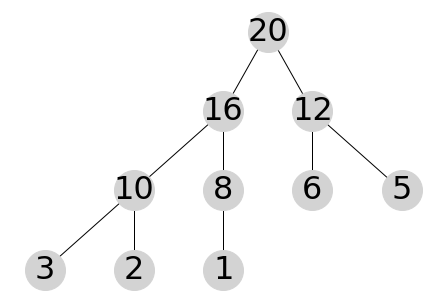

In [5]:
# Draw the graph
drawheap(L)

<ul>
    <sup><a href="#references">[10]</a></sup>
    <li>Root: $i = 1$</li>
    <li>Parent(i): $i/2$</li>
    <li>Left Child(i): $2i$</li>
    <li>Right Child(i): $2i + 1$</li>
</ul>

In [10]:
# We can determine the specified elements above using these functions

# Parent of 16 
# 16 is the second element in the array, but is positioned in index 1, therfore I am adding an additional value
# to the index count
p = ((L.index(16)) + 1) / 2
print("Parent of 16 is:",L[int(p-1)])

# Left child of 16
lChild = 2 * (L.index(16)) + 1
print("Left child of 16 is:",L[int(lChild)])

# Right child of 16
rChild = 2 * ((L.index(16)) + 1)
print("Right child of 16 is:",L[int(rChild)])

Parent of 16 is: 20
Left child of 16 is: 10
Right child of 16 is: 8


This allows us to <u>efficiently retrieve the values of a given nodes children</u> and determine if the current node needs to be sifted down in the current heap, to ensure it does not violate the max-heap property.


## Python: Implementation of HeapSort
***
Now that we've introduced the concept of a Heapsort, we can begin to demonstrate it's concept in code. The demonstrated implementation of HeapSort below has been translated and retrieved from the following <a href="https://brilliant.org/wiki/heap-sort/">resource</a>.

Throughout each section of code, I will in describe the purpose of each section and run through it step-by-step, similiar to how was done when discussing the intricacies of Heapsort in pseudocode.

## Computational Complexity
***
This section will discuss the the runtime complexity of the algorithm and how it compares to other algorithms found within the field (Bubble Sort, Quick Sort etc.)

## Application of Graph Theory
***
<p>In this last section, I will discuss the application of Graph Theory in Heap Sort, how it is implemented, and for what purpose.</p>

# References
***
<div id="references">
<p>[1] Britannica (Website): <a href="https://www.britannica.com/science/computer-science">Algorithms and Complexity</a><br><br>
[2] Isaac Computer Science (Website): <a href = "https://isaaccomputerscience.org/concepts/dsa_datastruct_definitions?examBoard=all&stage=all">Data types and data structures</a><br><br>
[3] SynergesticIT (Website): <a href="https://www.synergisticit.com/data-structures-and-algorithms/">How Data Structures and Algorithms are important for Computer Science Graduates?</a><br><br>
[4] Michael T. Goodrich, Roberto Tamassia, Michael H. Golwasser, "(9.3) Heaps", in Data Structures and Algorithms in Java, ed. 2014. <a href="https://books.google.ie/books?hl=en&lr=&id=UqmYAgAAQBAJ&oi=fnd&pg=PA2&dq=data+structures+and+algorithms&ots=p7E4UJ37w1&sig=1qS_PlJl13ZtKplzhnz8IeuARMA&redir_esc=y#v=onepage&q&f=false">PDF available</a><br><br>
[5] Lawrence J. Wobker and Paul E. Black, "internal node", in Dictionary of Algorithms and Data Structures [online], Paul E. Black, ed. 17 December 2004. Available from: <a>https://www.nist.gov/dads/HTML/internalnode.html</a><br><br>
[6] Wikipedia (Website): <a href="https://en.wikipedia.org/wiki/Binary_tree#Types_of_binary_trees">Properties of binary trees</a><br><br>
[7] Carnegie Mellon University (Website): <a href="https://www.andrew.cmu.edu/course/15-121/lectures/Binary%20Heaps/heaps.html">Binary Heaps</a><br><br>
[8] Sorting Algorithms (Website): <a href="http://syllabus.cs.manchester.ac.uk/ugt/2019/COMP26120/SortingTool/heap_sort_info.html">Heapsort</a><br><br>
[9] Brilliant.org (Website): <a href="https://brilliant.org/wiki/heap-sort/">Heapsort Algorithm</a><br><br>
[10] Prof S. Devadas, Prof E. Demaine, "Heaps and Heap Sort", Introduction to Algorithms [online lecture content]. Available from: <a href="https://ocw.mit.edu/courses/6-006-introduction-to-algorithms-fall-2011/resources/mit6_006f11_lec04/">MIT Open Courseware</a>
</p>
</div>
